In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('../data/experiment_data/mp_test_db.db')

sql = '''
SELECT
a.trial_id,
a.batch,
a.test_acc,
a.config_id,
unc_pct
FROM (results
INNER JOIN trials ON results.trial_id = trials.trial_id) as a
INNER JOIN configurations ON a.config_id = configurations.config_id
'''

df = pd.read_sql(sql, con)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   trial_id   9 non-null      int64  
 1   batch      9 non-null      int64  
 2   test_acc   9 non-null      float64
 3   config_id  9 non-null      int64  
 4   unc_pct    9 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 488.0 bytes


,trial_id,batch,test_acc,config_id,unc_pct
0,1,1,0.2251,1,0.0
1,2,1,0.2410,1,0.0
2,1,2,0.2487,1,0.0
3,3,1,0.2651,1,0.0
4,4,1,0.2669,2,0.2


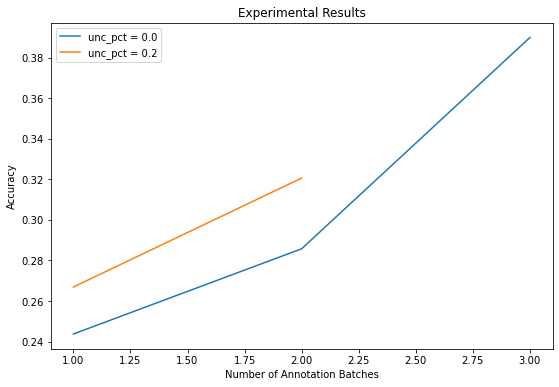

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
grouped = df.groupby(['unc_pct', 'batch'])['test_acc'].mean()
for unc_pct in df['unc_pct'].unique():
    ax.plot(grouped.loc[unc_pct], label=f'unc_pct = {round(unc_pct, 1)}')
ax.legend()
ax.set_xlabel('Number of Annotation Batches')
ax.set_ylabel('Accuracy')
ax.set_title('Experimental Results');